# Proyek Analisis Data: Bike Sharing
- **Nama:** Muh. Syuaib
- **Email:** msyuaib768@gmail.com
- **ID Dicoding:** muhsyuaib

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?
- Pada jam berapa dan hari apa penggunaan sepeda paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Mengimpor data yang telah diupload
df_day = pd.read_csv('/content/day.csv')
df_hour = pd.read_csv('/content/hour.csv')

# Menampilkan beberapa baris pertama dari dataset
print(df_day.head())
print(df_hour.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- Dataset day.csv mencatat jumlah peminjaman sepeda berdasarkan hari
- Dataset hour.csv mencatat peminjaman sepeda berdasarkan jam

### Assessing Data

In [3]:
# Menilai informasi dasar dari kedua dataset
print(df_day.info())
print(df_hour.info())

# Mengecek adanya nilai yang hilang (missing values)
print(df_day.isnull().sum())
print(df_hour.isnull().sum())

# Menampilkan statistik deskriptif
print(df_day.describe())
print(df_hour.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- Tidak ada nilai yang hilang (missing values) dalam kedua dataset
- Dataset memiliki beberapa kolom dengan tipe data yang tidak sesuai, seperti tanggal yang masih berupa string, sehingga perlu dikonversi.

### Cleaning Data

In [4]:
# Mengubah kolom 'dteday' menjadi datetime untuk mempermudah analisis berbasis waktu
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Menghapus kolom yang tidak diperlukan
df_day.drop(['instant', 'windspeed'], axis=1, inplace=True)
df_hour.drop(['instant', 'windspeed'], axis=1, inplace=True)

# Mengganti nama beberapa kolom agar lebih mudah dipahami
df_day.rename(columns={'dteday': 'dateday', 'yr': 'year', 'mnth': 'month', 'weekday': 'day_of_week',
                       'weathersit': 'weather_situation', 'hum': 'humidity', 'cnt': 'count'}, inplace=True)
df_hour.rename(columns={'dteday': 'dateday', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'weekday': 'day_of_week',
                        'weathersit': 'weather_situation', 'hum': 'humidity', 'cnt': 'count'}, inplace=True)

# Mengubah nilai pada kolom 'season' menjadi deskripsi kategori yang lebih mudah dipahami
df_day['season'] = df_day['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df_hour['season'] = df_hour['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Mengubah nilai pada kolom 'weather_situation' menjadi deskripsi kategori yang lebih mudah dipahami
df_day['weather_situation'] = df_day['weather_situation'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})
df_hour['weather_situation'] = df_hour['weather_situation'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})

# Mengubah nilai pada kolom 'day_of_week' menjadi nama hari yang lebih mudah dipahami
df_day['day_of_week'] = df_day['day_of_week'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                                                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df_hour['day_of_week'] = df_hour['day_of_week'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                                                     4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

**Insight:**
- Kolom dteday diubah menjadi tipe datetime untuk mempermudah analisis berbasis waktu, dan kolom yang tidak relevan dihapus dari kedua dataset.
- Kolom season, weather_situation, dan day_of_week yang sebelumnya berisi nilai numerik diubah menjadi deskripsi kategori yang lebih mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore Pola Penggunaan Sepeda Berdasarkan Musim dan Cuaca


In [5]:
# Menganalisis peminjaman sepeda berdasarkan musim dan kondisi cuaca
season_weather_df = df_day.groupby(['season', 'weather_situation'])['count'].mean().reset_index()

# Menampilkan hasil analisis
print(season_weather_df.head())

   season weather_situation        count
0    Fall             Clear  5878.257353
1    Fall        Light Snow  2751.750000
2    Fall              Mist  5222.479167
3  Spring             Clear  2811.135135
4  Spring        Light Snow   934.750000


**Insight:**
- Peminjaman sepeda cenderung lebih tinggi pada musim semi dan gugur (spring and fall), terlepas dari kondisi cuaca.
- Cuaca cerah cenderung meningkatkan jumlah peminjaman sepeda, terutama pada musim gugur.

### Explore Penggunaan Sepeda Berdasarkan Jam dan Hari


In [6]:
# Menganalisis peminjaman sepeda berdasarkan jam
hourly_usage_df = df_hour.groupby('hour')['count'].mean().reset_index()


# Menganalisis peminjaman sepeda berdasarkan hari dalam seminggu
daily_usage_df = df_day.groupby('day_of_week')['count'].mean().reset_index()

# Menampilkan hasil analisis
print(hourly_usage_df.head())
print(daily_usage_df.head())

   hour      count
0     0  53.898072
1     1  33.375691
2     2  22.869930
3     3  11.727403
4     4   6.352941
  day_of_week        count
0      Friday  4690.288462
1      Monday  4338.123810
2    Saturday  4550.542857
3      Sunday  4228.828571
4    Thursday  4667.259615


**Insight:**
- Musim Gugur (Fall) menunjukkan tingkat penyewaan tertinggi, terutama pada kondisi cuaca cerah.
- Peminjaman sepeda mencapai puncaknya pada sore hari (jam 17) dan di hari Jumat.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?

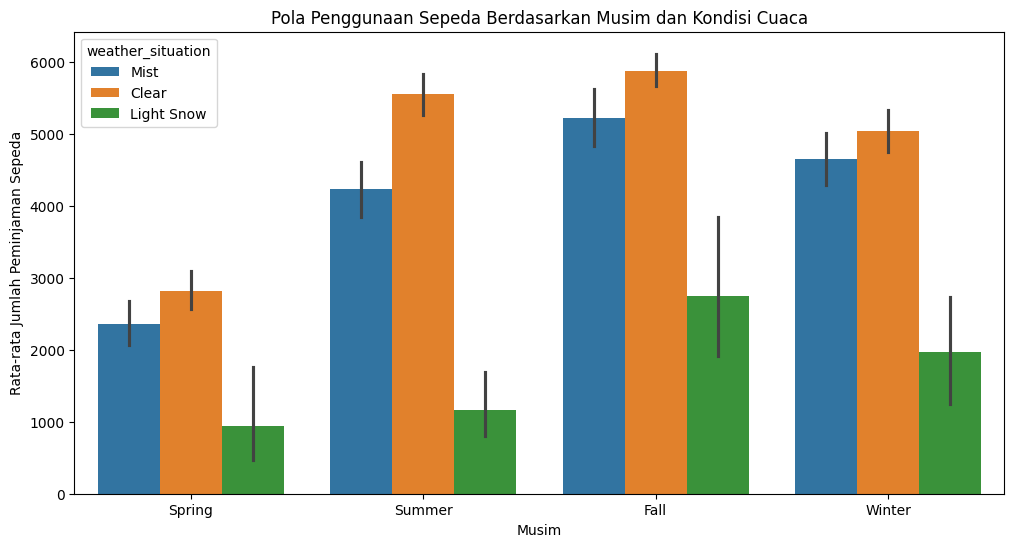

In [7]:
# Visualisasi pengaruh musim terhadap jumlah peminjaman sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='count', data=df_day, hue='weather_situation')
plt.title('Pola Penggunaan Sepeda Berdasarkan Musim dan Kondisi Cuaca')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')
plt.show()

**Insight:**
- Penggunaan sepeda meningkat pada jam 17:00, yang menunjukkan bahwa orang cenderung menggunakan sepeda setelah bekerja atau pada sore hari.
- Penggunaan sepeda lebih rendah pada jam-jam pagi hari (sebelum jam 7) dan malam hari (setelah jam 21).

### Pertanyaan 2: Pada jam berapa dan hari apa penggunaan sepeda paling tinggi?

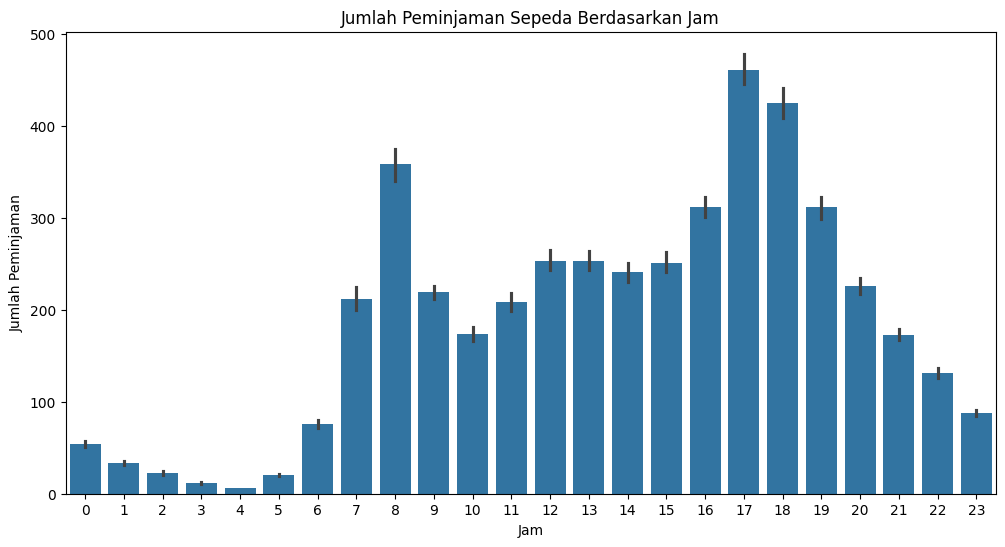

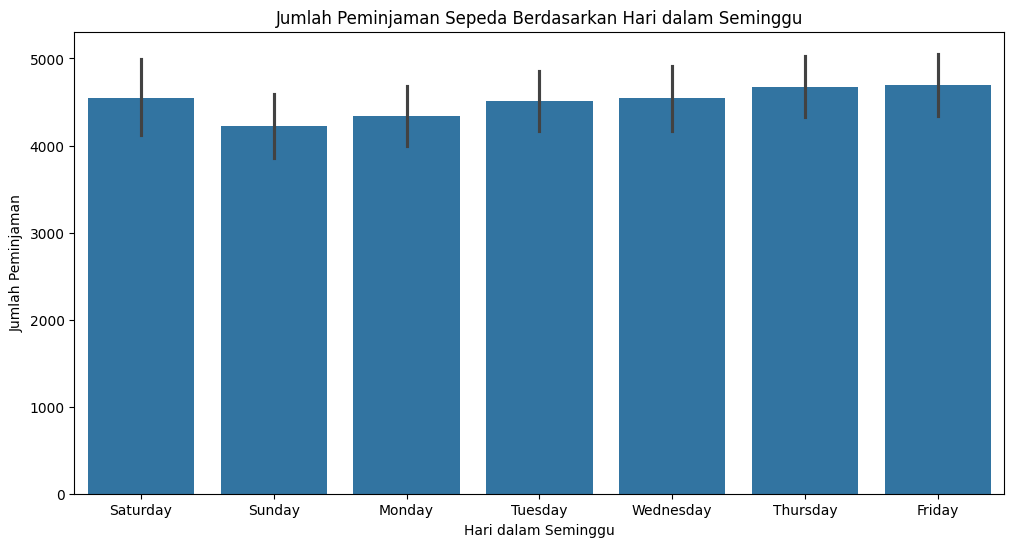

In [8]:
# Visualisasi peminjaman sepeda berdasarkan jam
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='count', data=df_hour)
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.show()

# Visualisasi peminjaman sepeda berdasarkan hari dalam seminggu
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='count', data=df_day)
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight:**
- Peminjaman sepeda paling tinggi terjadi pada hari Jumat, yang mungkin menunjukkan adanya peningkatan penggunaan sepeda menjelang akhir pekan.
- Penggunaan sepeda lebih rendah pada hari Minggu, yang bisa terkait dengan preferensi untuk beristirahat atau aktivitas lain di akhir pekan.

## Analisis Lanjutan (Opsional)

### Clustering

In [9]:
# Menambahkan fitur rata-rata jumlah peminjaman sepeda per bulan dan hari dalam seminggu
df_day['monthly_avg'] = df_day.groupby('month')['count'].transform('mean')
df_day['weekday_avg'] = df_day.groupby('day_of_week')['count'].transform('mean')

# Clustering dengan binning: Membagi data peminjaman ke dalam 4 kategori
df_day['usage_cluster'] = pd.cut(df_day['count'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Menampilkan beberapa baris dari hasil binning
print(df_day[['count', 'usage_cluster']])

     count usage_cluster
0      985           Low
1      801           Low
2     1349           Low
3     1562           Low
4     1600           Low
..     ...           ...
726   2114           Low
727   3095        Medium
728   1341           Low
729   1796           Low
730   2729        Medium

[731 rows x 2 columns]


**Insight:**
- Dengan binning memungkinkan pengelompokan pengguna berdasarkan tingkat penggunaan sepeda mereka, yang memungkinkan untuk merancang strategi pemasaran atau promosi berdasarkan segmentasi ini.

## Conclusion

- Musim gugur (fall) dan cuaca cerah cenderung meningkatkan jumlah peminjaman sepeda. Untuk perencanaan lebih lanjut, manajemen dapat memfokuskan promosi atau fasilitas pada musim ini untuk memaksimalkan penggunaan sepeda.
- Peminjaman sepeda paling tinggi terjadi pada jam 17:00, kemungkinan besar pada saat orang pulang kerja atau aktivitas. Oleh karena itu, meningkatkan jumlah sepeda di area-area yang padat pada jam-jam tersebut dapat membantu memenuhi permintaan. Juga, hari Jumat merupakan hari dengan jumlah peminjaman tertinggi, yang bisa dipertimbangkan untuk melakukan promosi atau meningkatkan fasilitas pada hari-hari tersebut.

## Save Dataset

In [10]:
df_day.to_csv("day_clean.csv", index=False)

In [11]:
df_hour.to_csv("hour_clean.csv", index=False)